In [1]:
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[]


In [3]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 20

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [7]:
pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-win_amd64.whl (14.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.4
    Uninstalling numpy-2.3.4:
      Successfully uninstalled numpy-2.3.4
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
onnxruntime 1.16.3 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scipy 1.16.2 requires numpy<2.6,>=1.25.2, but you have numpy 1.23.5 which is incompatible.


In [ ]:
!labelme

In [1]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.3.1
albucore                     0.0.24
albumentations               2.0.8
annotated-types              0.7.0
asttokens                    3.0.0
astunparse                   1.6.3
beautifulsoup4               4.14.2
cachetools                   6.2.1
certifi                      2025.10.5
charset-normalizer           3.4.4
click                        8.3.0
colorama                     0.4.6
coloredlogs                  15.0.1
comm                         0.2.3
contourpy                    1.3.3
cycler                       0.12.1
debugpy                      1.8.17
decorator                    5.2.1
executing                    2.2.1
filelock                     3.20.0
flatbuffers                  25.9.23
fonttools                    4.60.1
gast                         0.6.0
gdown                        5.2.0
google-auth                  2.41.1
google-auth-oauthlib         1.2.

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [5]:
images = tf.data.Dataset.list_files('data/images/*.jpg')

In [6]:
images.as_numpy_iterator().next()

b'data\\images\\e6b54a7f-b3d9-11f0-a8b7-5405dbdaf80b.jpg'

In [7]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [8]:
images = images.map(load_image)

In [10]:
images.as_numpy_iterator().next()

array([[[55, 47, 34],
        [53, 45, 34],
        [50, 41, 36],
        ...,
        [14, 19, 12],
        [18, 21, 12],
        [20, 23, 14]],

       [[50, 44, 32],
        [48, 41, 31],
        [46, 39, 33],
        ...,
        [13, 18, 11],
        [16, 19, 12],
        [18, 21, 12]],

       [[44, 40, 29],
        [42, 38, 29],
        [38, 33, 29],
        ...,
        [12, 17, 11],
        [15, 17, 12],
        [17, 20, 13]],

       ...,

       [[49, 58, 55],
        [54, 60, 58],
        [56, 60, 59],
        ...,
        [20, 14, 16],
        [21, 17, 18],
        [22, 18, 17]],

       [[47, 56, 51],
        [51, 57, 53],
        [53, 58, 54],
        ...,
        [23, 17, 17],
        [24, 19, 16],
        [24, 19, 16]],

       [[46, 56, 48],
        [49, 56, 49],
        [50, 55, 49],
        ...,
        [25, 20, 17],
        [25, 20, 17],
        [24, 19, 15]]], dtype=uint8)

In [11]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [12]:
image_generator = images.batch(4).as_numpy_iterator()

In [13]:
plot_images = image_generator.next()

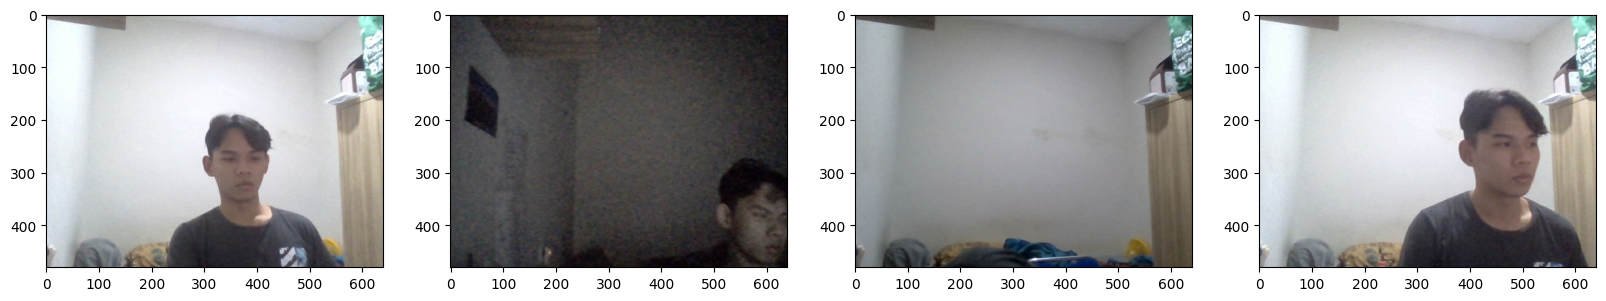

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [16]:
172*.7

120.39999999999999

In [17]:
172*.15

25.8

In [19]:
120 + 26 + 26

172

In [12]:
import os

for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath) 

In [13]:
import albumentations as alb

In [14]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [15]:
img = cv2.imread(os.path.join('data','train', 'images','0a2dce7f-b26c-11f0-acc2-5405dbdaf80b.jpg'))

In [16]:
with open(os.path.join('data', 'train', 'labels', '0a2dce7f-b26c-11f0-acc2-5405dbdaf80b.json'), 'r') as f:
    label = json.load(f)

In [17]:
label['shapes'][0]['points']

[[330.63829787234044, 177.5], [469.46808510638294, 352.5]]

In [18]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [19]:
coords

[330.63829787234044, 177.5, 469.46808510638294, 352.5]

In [20]:
coords = list(np.divide(coords, [640,480,640,480]))

In [21]:
coords

[0.5166223404255319, 0.3697916666666667, 0.7335438829787233, 0.734375]

In [22]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [23]:
augmented['bboxes'][0][2:]

[0.5608037482367622, 0.6633333439297147]

In [24]:
augmented['bboxes']

[[0.25229315863715274,
  0.2744444444444445,
  0.5608037482367622,
  0.6633333439297147]]

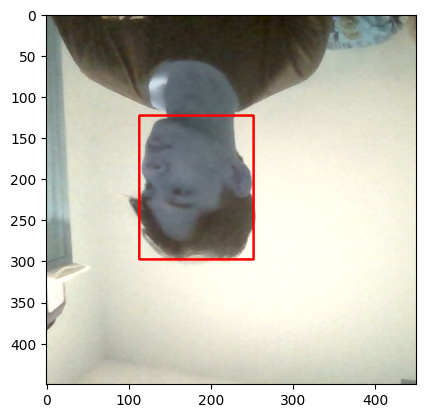

In [25]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [26]:
import os
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

In [27]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [28]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [29]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [32]:
train_images.as_numpy_iterator().next()

array([[[0.5613971 , 0.52542895, 0.452451  ],
        [0.5536152 , 0.5183211 , 0.4526348 ],
        [0.53786767, 0.50257355, 0.44375   ],
        ...,
        [0.70735294, 0.60949755, 0.5045956 ],
        [0.6822304 , 0.59362745, 0.4898897 ],
        [0.67849267, 0.58143383, 0.4829044 ]],

       [[0.5622549 , 0.5300858 , 0.4586397 ],
        [0.54068625, 0.5132353 , 0.4504902 ],
        [0.51776963, 0.48982844, 0.4285539 ],
        ...,
        [0.70098037, 0.6230392 , 0.5156863 ],
        [0.6935662 , 0.613174  , 0.50667894],
        [0.6895221 , 0.6003064 , 0.5056985 ]],

       [[0.5586397 , 0.5311887 , 0.46354166],
        [0.5485294 , 0.5205882 , 0.45931372],
        [0.5416054 , 0.51023287, 0.45925245],
        ...,
        [0.684375  , 0.6068627 , 0.49822304],
        [0.6728554 , 0.5910539 , 0.48498774],
        [0.6872549 , 0.60061276, 0.5085784 ]],

       ...,

       [[0.38333333, 0.57941175, 0.5323529 ],
        [0.38094363, 0.58278185, 0.5230392 ],
        [0.39068627, 0

In [33]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [34]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [36]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [37]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.376 , 0.1951, 0.7603, 0.6606], dtype=float16))

In [38]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7200, 7200, 1560, 1560, 1560, 1560)

In [39]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [40]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [41]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [42]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.2231, 0.406 , 0.5034, 0.7676],
        [0.1698, 0.632 , 0.425 , 0.853 ],
        [0.4724, 0.1489, 0.788 , 0.535 ],
        [0.1078, 0.2603, 0.3796, 0.6265],
        [0.1595, 0.3306, 0.544 , 0.799 ],
        [0.57  , 0.1592, 0.877 , 0.5786],
        [0.2537, 0.102 , 0.556 , 0.5146],
        [0.2656, 0.3845, 0.593 , 0.7886]], dtype=float16))

In [43]:
data_samples = train.as_numpy_iterator()

In [44]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


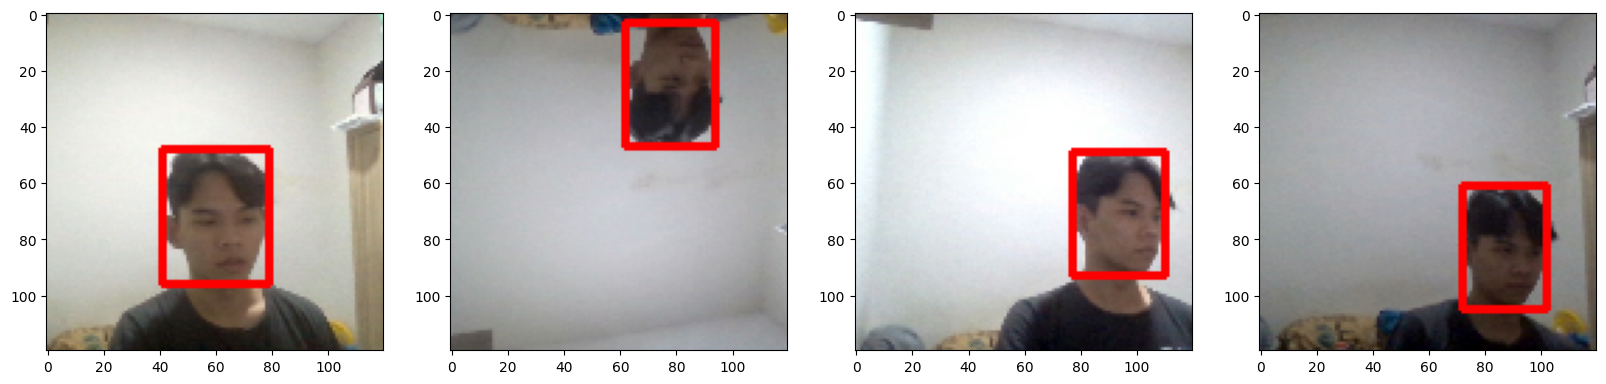

In [45]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [46]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [47]:
vgg = VGG16(include_top=False)

In [48]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [49]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [50]:
facetracker = build_model()

In [51]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [52]:
X, y = train.as_numpy_iterator().next()

In [53]:
X.shape

(8, 120, 120, 3)

In [54]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 759ms/step


In [55]:
classes, coords

(array([[0.76664954],
        [0.7005948 ],
        [0.7273457 ],
        [0.703066  ],
        [0.7310308 ],
        [0.6965662 ],
        [0.63053405],
        [0.7038485 ]], dtype=float32),
 array([[0.38702822, 0.34999174, 0.509795  , 0.42090392],
        [0.40670744, 0.43618882, 0.49524212, 0.4330496 ],
        [0.47082108, 0.35778946, 0.4990566 , 0.5388026 ],
        [0.3591955 , 0.32309797, 0.56132305, 0.5029708 ],
        [0.38580152, 0.4025407 , 0.5486481 , 0.51635426],
        [0.36494365, 0.34702292, 0.5356195 , 0.48225075],
        [0.45635197, 0.40805736, 0.4177126 , 0.4479139 ],
        [0.45107475, 0.36617598, 0.44615945, 0.48651448]], dtype=float32))

In [56]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [57]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [58]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [59]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [60]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7344882>

In [61]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.4142486>

In [62]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=1.7344882>

In [63]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [64]:
model = FaceTracker(facetracker)

In [65]:
model.compile(opt, classloss, regressloss)

In [66]:
logdir='logs'

In [67]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
 57/900 [>.............................] - ETA: 17:43 - total_loss: 0.8476 - class_loss: 0.1975 - regress_loss: 0.7488

In [70]:
hist.history

NameError: name 'hist' is not defined

NameError: name 'hist' is not defined

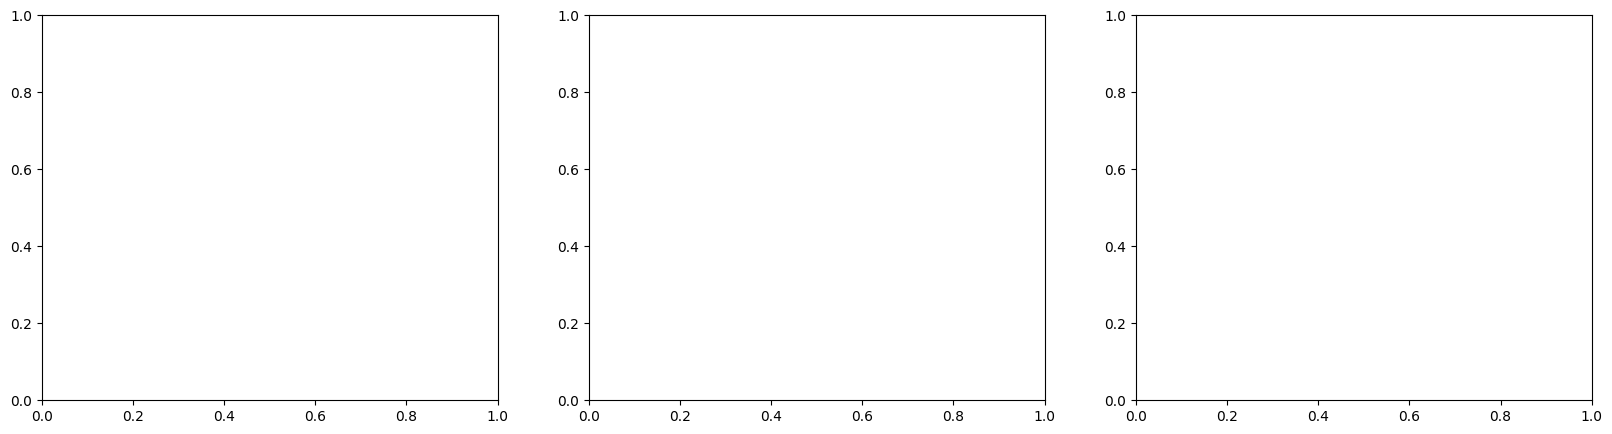

In [69]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [82]:
test_data = test.as_numpy_iterator()

In [83]:
test_sample = test_data.next()

In [68]:
yhat = facetracker.predict(test_sample[0])

NameError: name 'test_sample' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


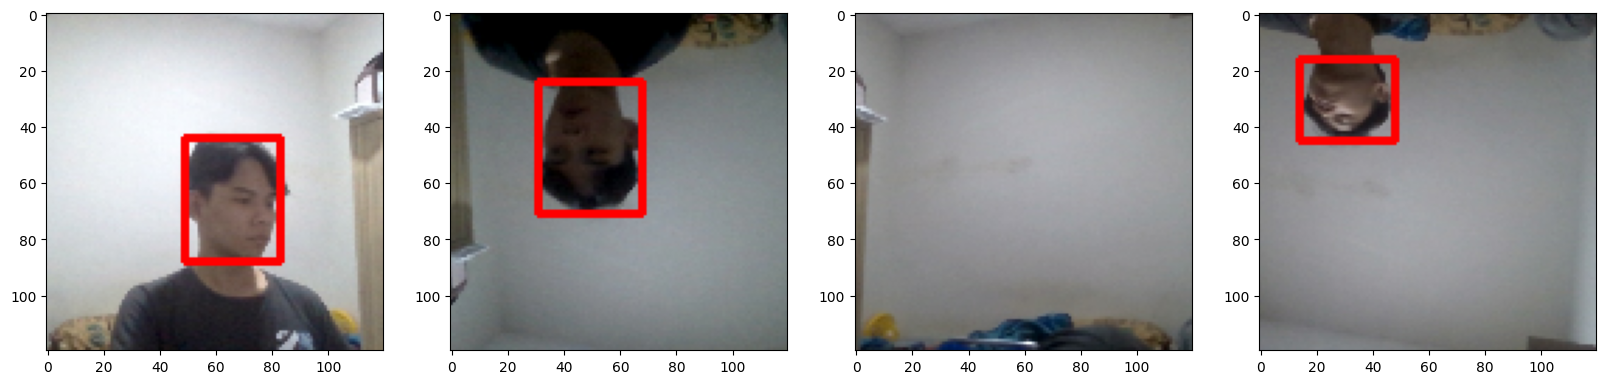

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx].copy()
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

In [87]:
from tensorflow.keras.models import load_model

In [6]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [89]:
facetracker = load_model('facetracker.h5')

In [2]:
import tensorflow as tf
facetracker = tf.keras.models.load_model('facetracker.h5')


In [4]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5:
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)

        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('FaceTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 74ms/step
